In [65]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from time import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import pandas
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
#from keras.layers import Input, Dense
#from keras.models import Model
#from keras import regularizers
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics import confusion_matrix

In [66]:
data =pd.read_csv("seeds.csv")
data.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [67]:
# columwise sum of all na values
import numpy as np

data.isna().sum()

Area               0
Perimeter          0
Compactness        0
Kernel.Length      0
Kernel.Width       0
Asymmetry.Coeff    0
Kernel.Groove      0
Type               0
dtype: int64

In [68]:
data['Type'].value_counts()

2    68
1    66
3    65
Name: Type, dtype: int64

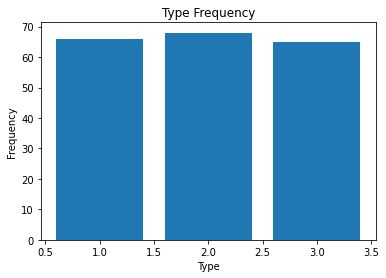

In [69]:
#Comaparaing outcome of diabetic patients using boxplot
import numpy as np
import matplotlib.pyplot as plt

classes = data['Type'].values
unique, counts = np.unique(classes, return_counts=True)


plt.bar(unique,counts)
plt.title('Type Frequency')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.show()

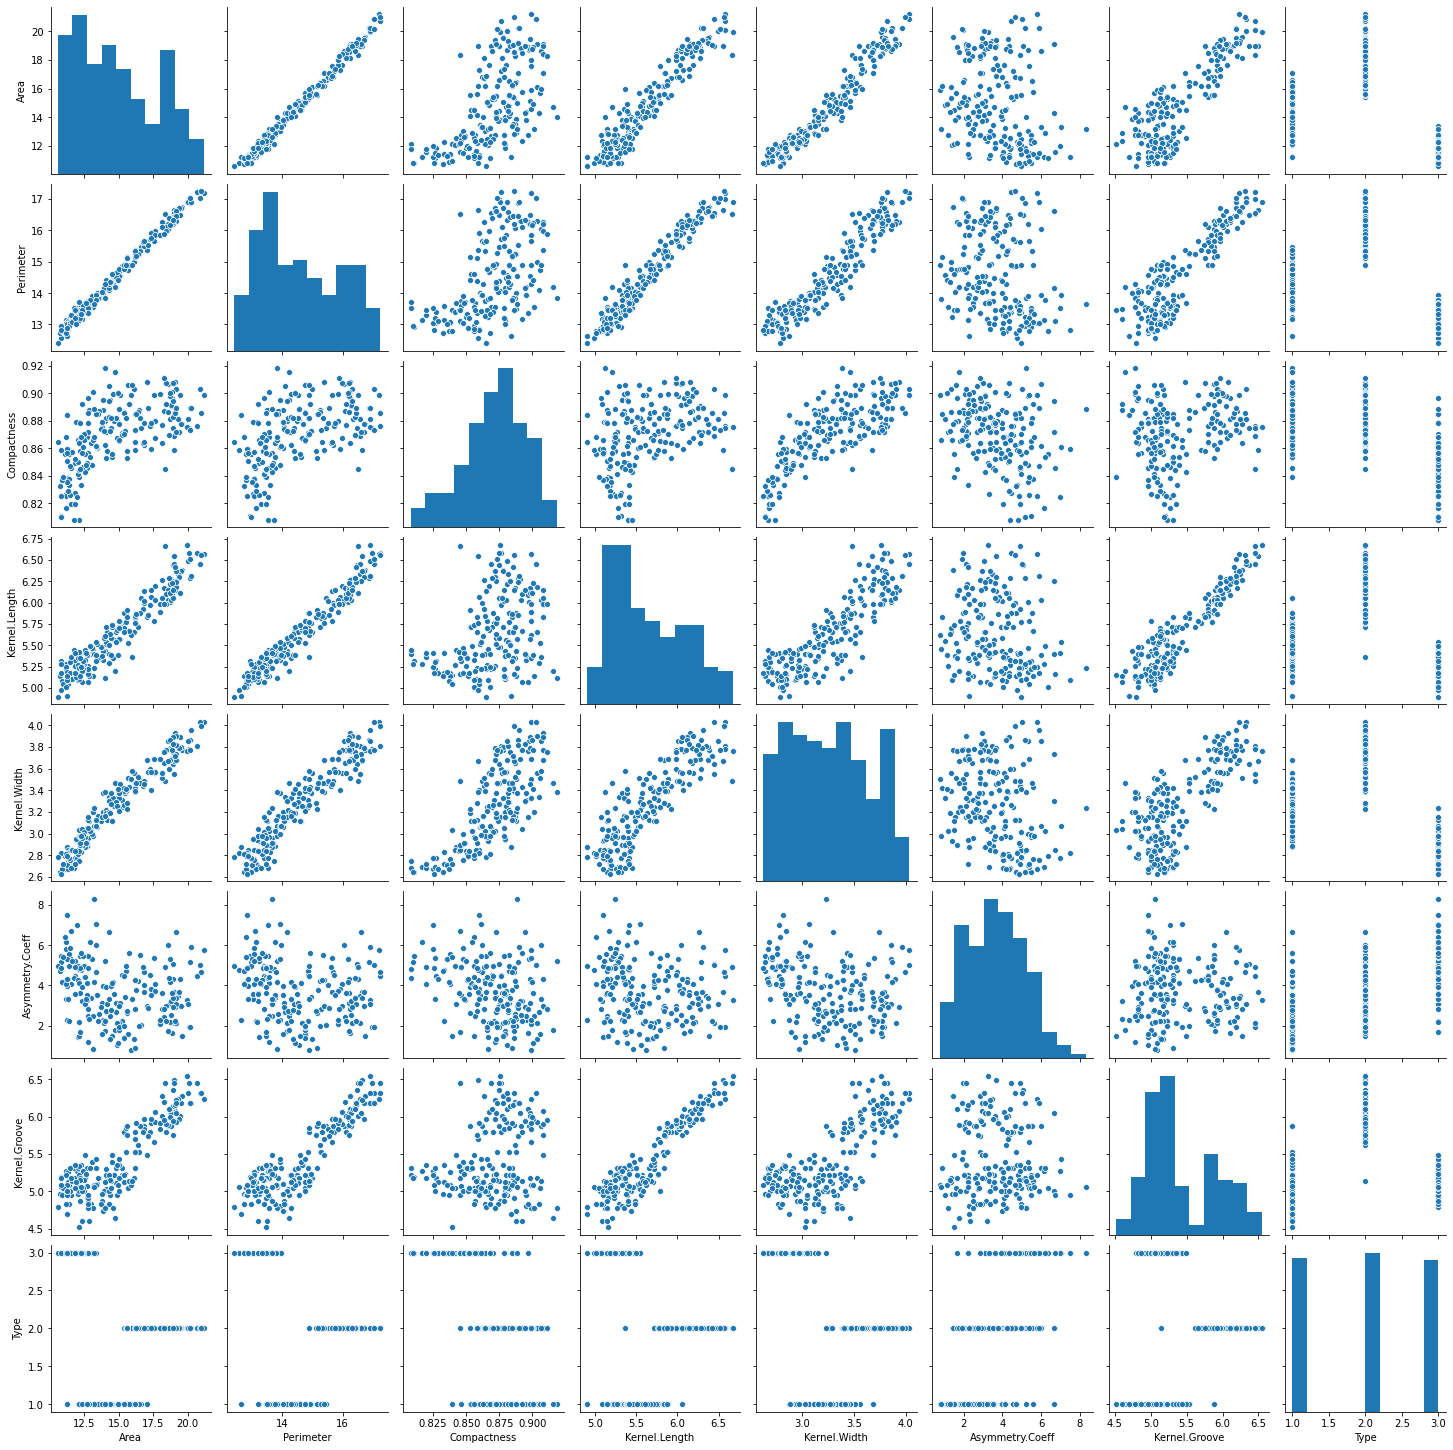

In [53]:
sns.pairplot(data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6fca82470>,
      dtype=object)

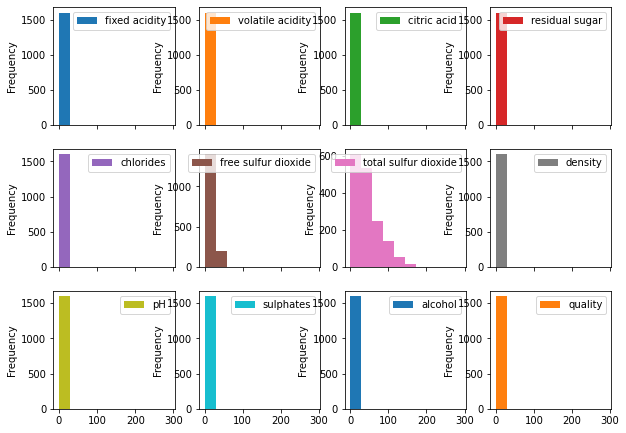

In [10]:
data.plot.hist(subplots=True, layout=(4,4), figsize=(10, 10), bins=10)


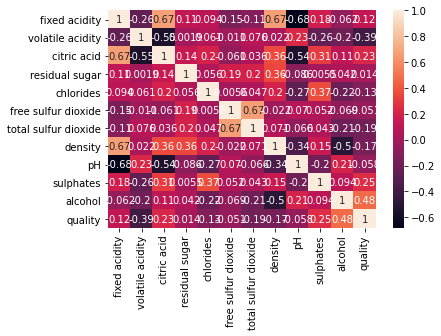

In [11]:
sns.heatmap(data.corr(), annot=True)

In [70]:
data.columns

Index(['Area', 'Perimeter', 'Compactness', 'Kernel.Length', 'Kernel.Width',
       'Asymmetry.Coeff', 'Kernel.Groove', 'Type'],
      dtype='object')

In [112]:

#Converting charater column to integer
from sklearn.preprocessing import LabelEncoder
# convert a string variable to a categorical one
data[["Area"]] = data[["Area"]].apply(LabelEncoder().fit_transform)
data[["Perimeter"]] = data[["Perimeter"]].apply(LabelEncoder().fit_transform)
data[["Compactness"]] = data[["Compactness"]].apply(LabelEncoder().fit_transform)
data[["Kernel.Length"]] = data[["Kernel.Length"]].apply(LabelEncoder().fit_transform)
data[["Kernel.Width"]] = data[["Kernel.Width"]].apply(LabelEncoder().fit_transform)
data[["Asymmetry.Coeff"]] = data[["Asymmetry.Coeff"]].apply(LabelEncoder().fit_transform)
data[["Kernel.Groove"]] = data[["Kernel.Groove"]].apply(LabelEncoder().fit_transform)
data=data.mask(data==0).fillna(data.mean())

data.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,109.0,94.0,83.0,111.0,93.0,35.0,56.0,1
1,102.0,86.0,113.0,88.0,95.0,3.0,18.0,1
2,88.0,69.0,167.0,46.0,96.0,51.0,11.0,1
3,78.0,63.0,148.0,52.0,99.0,40.0,10.0,1
4,121.0,101.0,165.0,97.0,129.0,7.0,48.0,1


In [113]:
df = pd.read_csv("wheattest.csv")

In [114]:

#Converting charater column to integer
from sklearn.preprocessing import LabelEncoder
# convert a string variable to a categorical one
df[["Area"]] = df[["Area"]].apply(LabelEncoder().fit_transform)
df[["Perimeter"]] = df[["Perimeter"]].apply(LabelEncoder().fit_transform)
df[["Compactness"]] = df[["Compactness"]].apply(LabelEncoder().fit_transform)
df[["Kernel.Length"]] = df[["Kernel.Length"]].apply(LabelEncoder().fit_transform)
df[["Kernel.Width"]] = data[["Kernel.Width"]].apply(LabelEncoder().fit_transform)
df[["Asymmetry.Coeff"]] = df[["Asymmetry.Coeff"]].apply(LabelEncoder().fit_transform)
df[["Kernel.Groove"]] = df[["Kernel.Groove"]].apply(LabelEncoder().fit_transform)
df=df.mask(df==0).fillna(df.mean())

data.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,109.0,94.0,83.0,111.0,93.0,35.0,56.0,1
1,102.0,86.0,113.0,88.0,95.0,3.0,18.0,1
2,88.0,69.0,167.0,46.0,96.0,51.0,11.0,1
3,78.0,63.0,148.0,52.0,99.0,40.0,10.0,1
4,121.0,101.0,165.0,97.0,129.0,7.0,48.0,1


In [115]:
train = data.head(100)
test = df.head(99)

In [116]:

from sklearn.preprocessing import StandardScaler

#Separating o and 1 classes data
df_class0 = train
df_class1 = test

#Countig length of each class data

ln0=int(len(df_class0)/10)
ln1=int(len(df_class1)/10)

init0=0
init1=0

bins=[]



#Creating 10 bins keeping imbalance percentage as original
for i in range(10):
    curr_bin=pd.concat([df_class0.iloc[init0:init0+ln0,:],df_class1.iloc[init1:init1+ln1,:]])
    target_cnt=curr_bin.Type.value_counts()
    bins.append(curr_bin.values)
    init0+=ln0
    init1+=ln1


# Preprocessing 9 Bins data as X_train and curr_bin as X_test
bin9=np.vstack((bins[j] for j in range(10) if j!=i )) #combining 9 bins data
data1=pd.DataFrame(bin9)
data1.columns=data.columns

X_train=data1.iloc[:,1:5]
y_train=data1.iloc[:,5:9]
X_test=curr_bin.iloc[:,1:5]
y_test=curr_bin.iloc[:,5:9]

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


In [117]:

#Cross-validation 
X = data1.iloc[:,1:7]
y = data1.iloc[:,7:8]

from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report


# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

print("--10-fold cross-validation ")

#Defining Decision Tree
dt_clf = DecisionTreeClassifier(criterion="gini", random_state=10, max_depth=2, min_samples_leaf=4)

#Training Decision Tree
dt_clf.fit(X_train, y_train)

#Cross Validating using Decision Tree
old_dt_scores =cross_validate(dt_clf,  X_test, y_test.values.ravel(),
                     cv=10)

y_prdct=dt_clf.predict(X_test)
#Result
print("All DT scores: ")
print(old_dt_scores)
print("Accuracy mean is:", old_dt_scores['test_score'].mean())

print(classification_report(y_test, y_prdct))




--10-fold cross-validation 
All DT scores: 
{'fit_time': array([0.00357103, 0.00292802, 0.00299621, 0.00220919, 0.00187087,
       0.00188279, 0.00207162, 0.0021677 , 0.00211263, 0.00205827]), 'score_time': array([0.00134754, 0.00118637, 0.00125408, 0.00103498, 0.00079656,
       0.00095558, 0.00093412, 0.00096726, 0.00086284, 0.00086594]), 'test_score': array([0.5       , 0.5       , 0.5       , 0.75      , 0.5       ,
       0.33333333, 0.66666667, 0.66666667, 0.66666667, 0.33333333])}
Accuracy mean is: 0.5416666666666666
              precision    recall  f1-score   support

         1.0       0.60      0.30      0.40        10
         2.0       0.73      0.94      0.82        17
         3.0       0.88      0.88      0.88         8

    accuracy                           0.74        35
   macro avg       0.73      0.71      0.70        35
weighted avg       0.72      0.74      0.71        35



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve


#Defining Random Forest Classifier
rf_clf = RandomForestClassifier(criterion="gini", random_state=10, max_depth=4, min_samples_leaf=4)

#Training Random Forest Classifier
rf_clf.fit(X_train, y_train)

#Cross Validating Random Forest
old_rf_scores =cross_validate(rf_clf, X_test, y_test.values.ravel(),
                     cv=5)

y_prdct=rf_clf.predict(X_test)
#Result
print("All RF scores: ")
print(old_rf_scores)

print("Accuracy mean is:", old_rf_scores['test_score'].mean())

print(classification_report(y_test, y_prdct))



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


All RF scores: 
{'fit_time': array([0.12426591, 0.11939049, 0.12539196, 0.12635946, 0.11982799]), 'score_time': array([0.00881934, 0.01006436, 0.00828958, 0.01239538, 0.01043081]), 'test_score': array([0.85714286, 0.85714286, 0.71428571, 0.85714286, 0.57142857])}
Accuracy mean is: 0.7714285714285714
              precision    recall  f1-score   support

         1.0       0.89      0.80      0.84        10
         2.0       0.94      0.94      0.94        17
         3.0       0.89      1.00      0.94         8

    accuracy                           0.91        35
   macro avg       0.91      0.91      0.91        35
weighted avg       0.91      0.91      0.91        35



In [119]:
## importing libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import os
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import roc_auc_score






In [120]:
train.head()
train.count()

Area               100
Perimeter          100
Compactness        100
Kernel.Length      100
Kernel.Width       100
Asymmetry.Coeff    100
Kernel.Groove      100
Type               100
dtype: int64

In [121]:
test.head()
test.count()

Area               99
Perimeter          99
Compactness        99
Kernel.Length      99
Kernel.Width       99
Asymmetry.Coeff    99
Kernel.Groove      99
Type               99
dtype: int64

In [122]:
#### Preprocessing This step involves imputing all missing values and label encoding of all categorical variables.####

## missing values
for i in train.columns:
    if train[i].dtype == 'object':
      train[i] = train[i].fillna(train[i].mode().iloc[0])
    if (train[i].dtype == 'int' or train[i].dtype == 'float'):
      train[i] = train[i].fillna(np.mean(train[i]))


for i in test.columns:
    if test[i].dtype == 'str':
      test[i] = test[i].fillna(test[i].mode().iloc[0])
    if (test[i].dtype == 'int' or test[i].dtype == 'int'
    

## label encoding
number = LabelEncoder()
for i in train.columns:
    if (train[i].dtype == 'str'):
      train[i] = number.fit_transform(train[i].astype('int'))
      train[i] = train[i].astype('int')

for i in test.columns:
    if (test[i].dtype == 'str'):
      test[i] = number.fit_transform(test[i].astype('int'))
      test[i] = test[i].astype('int')


SyntaxError: ignored

In [133]:
## creating a new feature origin
train['origin'] = 0
test['origin'] = 1
training = train.drop('Perimeter',axis=1) #droping target variable

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [134]:
## taking sample from training and test data
training = training.sample(100, random_state=12)
testing = test.sample(99, random_state=11)


In [135]:
## combining random samples
combi = training.append(testing)
y = combi['origin']
combi.drop('origin',axis=1,inplace=True)

In [136]:
## modelling
model = RandomForestClassifier(n_estimators = 50, max_depth = 5,min_samples_leaf = 5)
drop_list = []
for i in combi.columns:
  score = cross_val_score(model,pd.DataFrame(combi[i]),y,cv=2,scoring='roc_auc')
  #The value of AUC-ROC for a particular feature is greater than 0.80, we classify that feature as drifting.
  if (np.mean(score) > 0.8):
    drop_list.append(i)
  print(i,np.mean(score))

Area 0.8613673469387756
Compactness 0.8096081632653062
Kernel.Length 0.8344836734693878
Kernel.Width 0.33032244897959184
Asymmetry.Coeff 0.5080285714285715
Kernel.Groove 0.6064938775510204
Type 0.9405183673469388
Perimeter nan


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

  FitFailedWarning)


In [90]:
!pip install modAL

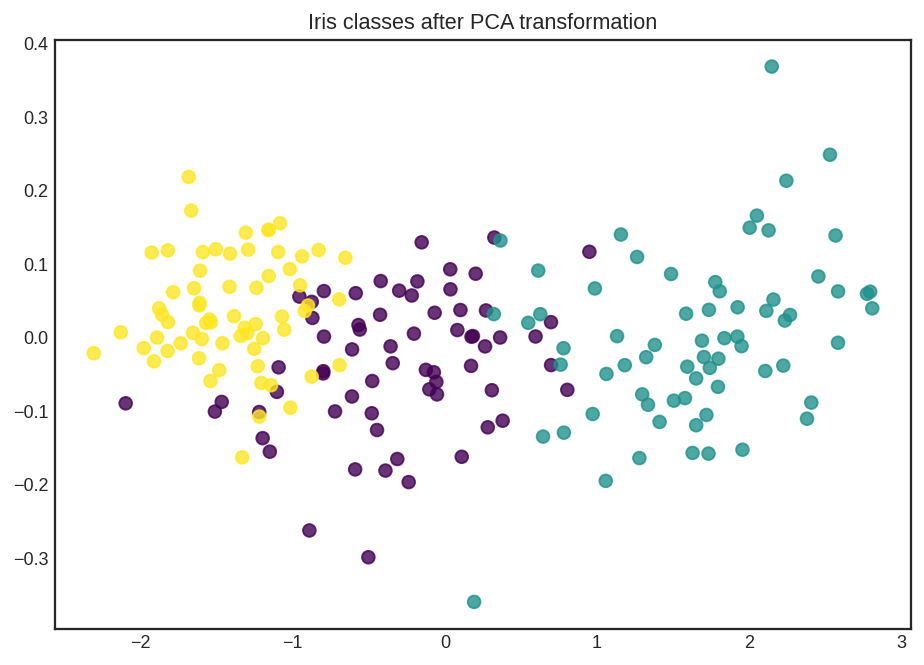

KeyError: ignored

In [155]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from functools import partial

from modAL.batch import uncertainty_batch_sampling
from modAL.models import ActiveLearner

# Set our RNG for reproducibility.
RANDOM_STATE_SEED = 123
np.random.seed(RANDOM_STATE_SEED)

iris = pd.read_csv("seeds.csv")
X_raw = iris[iris.columns[1:4]]
y_raw = iris['Type']

# Define our PCA transformer and fit it onto our raw dataset.
pca = PCA(n_components=2, random_state=RANDOM_STATE_SEED)
transformed_iris = pca.fit_transform(X=X_raw)

# Isolate the data we'll need for plotting.
x_component, y_component = transformed_iris[:, 0], transformed_iris[:, 1]

# Plot our dimensionality-reduced (via PCA) dataset.
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(8.5, 6), dpi=130)
    plt.scatter(x=x_component, y=y_component, c=y_raw, cmap='viridis', s=50, alpha=8/10)
    plt.title('Iris classes after PCA transformation')
    plt.show()

# Isolate our examples for our labeled dataset.
n_labeled_examples = X_raw.shape[0]
training_indices = np.random.randint(low=0, high=n_labeled_examples + 1, size=3)

X_train = X_raw[training_indices]
y_train = y_raw[training_indices]

# Visualize the training data.
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(6, 6), dpi=100)
    plt.scatter(transformed_iris[:, 0], transformed_iris[:, 1], c='0.8', label='unlabeled')
    plt.scatter(transformed_iris[training_indices, 0], transformed_iris[training_indices, 1], c='k', label='labeled')
    plt.title('Unlabeled and labeled data')
    plt.legend()
    plt.show()

# Isolate the non-training examples we'll be querying.
X_pool = np.delete(X_raw, training_indices, axis=0)
y_pool = np.delete(y_raw, training_indices, axis=0)

# Specify our core estimator.
knn = KNeighborsClassifier(n_neighbors=3)

# Pre-set our batch sampling to retrieve 3 samples at a time.
BATCH_SIZE = 3
preset_batch = partial(uncertainty_batch_sampling, n_instances=BATCH_SIZE)

# Specify our active learning model.
learner = ActiveLearner(
    estimator=knn,
    X_training=X_train,
    y_training=y_train,
    query_strategy=preset_batch
)

# Isolate the data we'll need for plotting.
predictions = learner.predict(X_raw)
is_correct = (predictions == y_raw)

# Record our learner's score on the raw data.
unqueried_score = learner.score(X_raw, y_raw)

# Plot our classification results.
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)
    ax.scatter(x=x_component[is_correct],  y=y_component[is_correct],  c='g', marker='+', label='Correct')
    ax.scatter(x=x_component[~is_correct], y=y_component[~is_correct], c='r', marker='x', label='Incorrect')
    ax.legend(loc='lower right')
    ax.set_title("ActiveLearner class predictions (Accuracy: {score:.3f})".format(score=unqueried_score))
    plt.show()

# Pool-based sampling
N_RAW_SAMPLES = 20
N_QUERIES = N_RAW_SAMPLES // BATCH_SIZE

performance_history = [unqueried_score]

for index in range(N_QUERIES):
    query_index, query_instance = learner.query(X_pool)

    # Teach our ActiveLearner model the record it has requested.
    X, y = X_pool[query_index], y_pool[query_index]
    learner.teach(X=X, y=y)

    # Remove the queried instance from the unlabeled pool.
    X_pool = np.delete(X_pool, query_index, axis=0)
    y_pool = np.delete(y_pool, query_index)

    # Calculate and report our model's accuracy.
    model_accuracy = learner.score(X_raw, y_raw)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=model_accuracy))

    # Save our model's performance for plotting.
    performance_history.append(model_accuracy)

    # Visualize the instances selected for query.
    if index == 0:
        selected = pca.transform(query_instance)

        with plt.style.context('seaborn-white'):
            plt.figure(figsize=(6, 6), dpi=100)
            plt.scatter(transformed_iris[:, 0], transformed_iris[:, 1], c='0.8', label='unlabeled')
            plt.scatter(transformed_iris[training_indices, 0], transformed_iris[training_indices, 1], c='k',
                        label='training')
            plt.scatter(selected[:, 0], selected[:, 1], c='r', label='1st query')
            plt.title('Unlabeled and labeled data')
            plt.legend()
            plt.show()



In [110]:
#In this example the use of ActiveLearner is demonstrated on the iris dataset in a pool-based sampling setting.
#For more information on the iris dataset, see https://en.wikipedia.org/wiki/Iris_flower_data_set
#For its scikit-learn interface, see http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html


import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from modAL.models import ActiveLearner

# loading the iris dataset
iris = pd.read_csv("seeds.csv")

# visualizing the classes
with plt.style.context('seaborn-white'):
    pca = PCA(n_components=2).fit_transform(data.iloc[:,1:4])
    plt.figure(figsize=(7, 7))
    plt.scatter(x=pca[:, 0], y=pca[:, 1], c=iris['Type'], cmap='viridis', s=50)
    plt.title('The iris dataset')
    plt.show()

# initial training data
train_idx = [0, 5, 10]
X_train = data[train_idx]
y_train = iris['target'][train_idx]

# generating the pool
X_pool = np.delete(data.iloc[:,1:4], train_idx, axis=0)
y_pool = np.delete(iris['target'], train_idx)

# initializing the active learner
learner = ActiveLearner(
    estimator=KNeighborsClassifier(n_neighbors=3),
    X_training=X_train, y_training=y_train
)

# visualizing initial prediction
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(7, 7))
    prediction = learner.predict(data.iloc[:,1:8])
    plt.scatter(x=pca[:, 0], y=pca[:, 1], c=prediction, cmap='viridis', s=50)
    plt.title('Initial accuracy: %f' % learner.score(data.iloc[:,1:8], iris['target']))
    plt.show()

print('Accuracy before active learning: %f' % learner.score(data.iloc[:,1:8], iris['target']))

# pool-based sampling
n_queries = 20
for idx in range(n_queries):
    query_idx, query_instance = learner.query(X_pool)
    learner.teach(
        X=X_pool[query_idx].reshape(1, -1),
        y=y_pool[query_idx].reshape(1, )
    )
    # remove queried instance from pool
    X_pool = np.delete(X_pool, query_idx, axis=0)
    y_pool = np.delete(y_pool, query_idx)
    print('Accuracy after query no. %d: %f' % (idx+1, learner.score(data.iloc[:,1:8], iris['target'])))

# plotting final prediction
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(7, 7))
    prediction = learner.predict(iris['data'])
    plt.scatter(x=pca[:, 0], y=pca[:, 1], c=prediction, cmap='viridis', s=50)
    plt.title('Classification accuracy after %i queries: %f' % (n_queries, learner.score(data.iloc[:,1:8], iris['target'])))
    plt.show()


SyntaxError: ignored